In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime
# import requests_cache
# import yfinance as yf

In [72]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2020, 12, 31)

symbol=['NKE','MSFT','AAPL','CVX','IBM','AXP']


# session = requests_cache.CachedSession('yfinance.cache')
# session.headers['User-agent'] = 'my-program/1.0'

data_exchange={}
for s in symbol:
      data_exchange[s] =  web.get_data_yahoo(s, start=start, end=end)#, session=session) 


In [73]:
data_exchange['NKE'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,48.474998,47.055000,48.275002,47.514999,4985800.0,44.005413
2015-01-05,47.275002,46.564999,47.255001,46.750000,6889200.0,43.296913
2015-01-06,47.075001,46.035000,46.945000,46.474998,7576000.0,43.042225
2015-01-07,47.650002,46.549999,46.805000,47.435001,7256000.0,43.931316
2015-01-08,48.549999,47.810001,47.830002,48.529999,5978200.0,44.945442


In [74]:
def pivot_tikers(dict_df,col):
    item=[]
    tikers=[]
    for tiker in data_exchange.keys():
        data=dict_df[tiker][col]
        item.append(data)
        tikers.append(tiker)
    combine=pd.concat(item, axis=1) 
    combine.columns=tikers
    return combine
    

In [75]:
stoks_open=pivot_tikers(data_exchange,'Open')
stoks_open.head(5)

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2015-01-02,48.275002,46.660000,27.847500,111.629997,154.216064,93.169998
2015-01-05,47.255001,46.369999,27.072500,110.959999,154.177826,92.459999
2015-01-06,46.945000,46.380001,26.635000,107.870003,152.648178,90.790001
2015-01-07,46.805000,45.980000,26.799999,109.250000,150.286804,91.010002
2015-01-08,47.830002,46.750000,27.307501,109.190002,149.369019,91.440002


In [76]:
stoks_close=pivot_tikers(data_exchange,'Close')
stoks_close.head(5)

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2015-01-02,47.514999,46.759998,27.332500,112.580002,154.933075,93.019997
2015-01-05,46.750000,46.330002,26.562500,108.080002,152.495224,90.559998
2015-01-06,46.474998,45.650002,26.565001,108.029999,149.206497,88.629997
2015-01-07,47.435001,46.230000,26.937500,107.940002,148.231354,90.300003
2015-01-08,48.529999,47.590000,27.972500,110.410004,151.453156,91.580002


In [77]:
stoks_volume=pivot_tikers(data_exchange,'Volume')
stoks_volume.head(5)

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2015-01-02,4985800.0,27913900.0,212818400.0,5898800.0,5779673.0,2437500.0
2015-01-05,6889200.0,39673900.0,257142000.0,11758100.0,5104898.0,3469600.0
2015-01-06,7576000.0,36447900.0,263188400.0,11591600.0,6429448.0,4800300.0
2015-01-07,7256000.0,29114100.0,160423600.0,10353800.0,4918083.0,5665200.0
2015-01-08,5978200.0,29645200.0,237458000.0,8650800.0,4431693.0,3774200.0


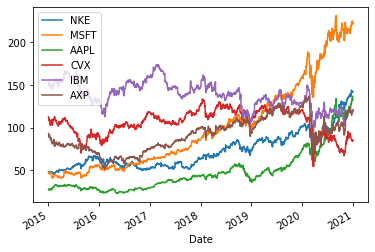

In [78]:
stoks_close.plot();

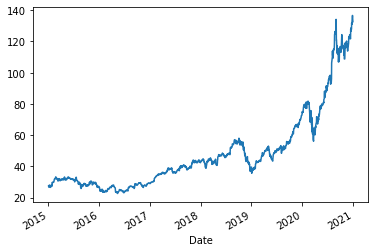

In [79]:
stoks_close['AAPL'].plot();

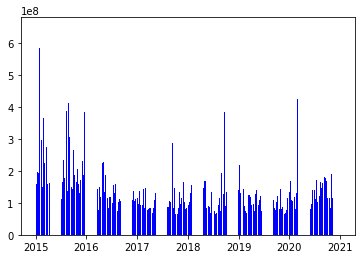

In [80]:
plt.bar(stoks_volume['AAPL'].index,stoks_volume['AAPL'].values, color ='b');

In [81]:
# Здесь разбираемся сами и совмещаем два графика



### Вычисляем ежедневное процентное закрытие
$$ r_t =\dfrac{p_t}{p_{t-1}}-1 $$

In [82]:
daily_pct_na=(stoks_close/stoks_close.shift(1)-1)
daily_pct_na.head()

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.016100,-0.009196,-0.028172,-0.039972,-0.015735,-0.026446
2015-01-06,-0.005882,-0.014677,0.000094,-0.000463,-0.021566,-0.021312
2015-01-07,0.020656,0.012705,0.014022,-0.000833,-0.006536,0.018842
2015-01-08,0.023084,0.029418,0.038422,0.022883,0.021735,0.014175


In [83]:
#тут внимательнее с данными
daily_pct_0=(stoks_close/stoks_close.shift(1)-1).fillna(0)
daily_pct_0.head()

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2015-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-05,-0.016100,-0.009196,-0.028172,-0.039972,-0.015735,-0.026446
2015-01-06,-0.005882,-0.014677,0.000094,-0.000463,-0.021566,-0.021312
2015-01-07,0.020656,0.012705,0.014022,-0.000833,-0.006536,0.018842
2015-01-08,0.023084,0.029418,0.038422,0.022883,0.021735,0.014175


### Вычисляем кумулятивную процентную доходность
$$ i_0=r_0=0 $$
$$ i_t=(i_{t-1}+r_t)100 $$

In [84]:
daily_sum_na=(daily_pct_na*100).cumsum()
daily_sum_na.head(5)

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-1.610017,-0.919582,-2.817161,-3.997158,-1.573486,-2.644592
2015-01-06,-2.198255,-2.387314,-2.807747,-4.043422,-3.730096,-4.775776
2015-01-07,-0.132622,-1.116782,-1.405528,-4.126729,-4.383649,-2.891531
2015-01-08,2.175794,1.825032,2.436699,-1.838420,-2.210154,-1.474036


In [85]:
daily_sum_0=(daily_pct_0*100).cumsum()
daily_sum_0.head(5)

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2015-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-05,-1.610017,-0.919582,-2.817161,-3.997158,-1.573486,-2.644592
2015-01-06,-2.198255,-2.387314,-2.807747,-4.043422,-3.730096,-4.775776
2015-01-07,-0.132622,-1.116782,-1.405528,-4.126729,-4.383649,-2.891531
2015-01-08,2.175794,1.825032,2.436699,-1.838420,-2.210154,-1.474036


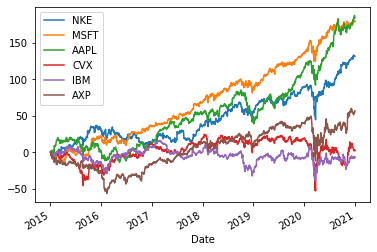

In [86]:
daily_sum_0.plot();

### Вычисляем накопленную процентную доходность
$$ i_0 = 1 $$
$$ i_t = (1+r_t) i_{t-1} $$

In [87]:
daily_prod_na=(1 + daily_pct_na).cumprod()
daily_prod_na.head(5)

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.983900,0.990804,0.971828,0.960028,0.984265,0.973554
2015-01-06,0.978112,0.976262,0.971920,0.959584,0.963038,0.952806
2015-01-07,0.998316,0.988666,0.985548,0.958785,0.956744,0.970759
2015-01-08,1.021362,1.017750,1.023415,0.980725,0.977539,0.984520


In [88]:
daily_prod_0=(1 + daily_pct_0).cumprod()
daily_prod_0.head(5)

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.983900,0.990804,0.971828,0.960028,0.984265,0.973554
2015-01-06,0.978112,0.976262,0.971920,0.959584,0.963038,0.952806
2015-01-07,0.998316,0.988666,0.985548,0.958785,0.956744,0.970759
2015-01-08,1.021362,1.017750,1.023415,0.980725,0.977539,0.984520


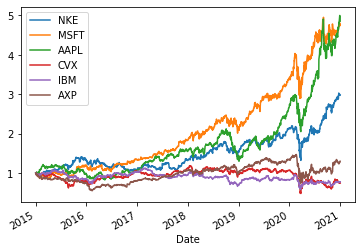

In [89]:
daily_prod_0.plot();

In [90]:
daily_prod_0.asfreq(freq='M')

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-31,1.055772,0.869547,1.138114,0.932492,0.990374,0.839819
2015-04-30,1.040093,1.040205,1.144700,0.986498,1.056954,0.832617
2015-05-31,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-08-31,2.354835,4.823140,4.721119,0.745514,0.760891,1.092131
2020-09-30,2.642113,4.498075,4.237080,0.639545,0.750771,1.077725
2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
month_sum_q=daily_sum_0.asfreq(freq='BM')
month_sum_q

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2015-01-30,-2.769339,-13.865716,7.460486,-8.995970,-5.313917,-13.969041
2015-02-27,2.480157,-5.590073,16.837736,-4.837586,0.264801,-12.459736
2015-03-31,5.909567,-12.966833,13.852624,-6.225522,-0.426772,-16.660705
2015-04-30,4.470386,5.626976,14.583567,-0.495602,6.256499,-17.364719
2015-05-29,7.356099,2.060715,18.788186,-7.959816,5.367099,-14.421398
...,...,...,...,...,...,...
2020-08-31,106.849798,179.050435,178.925312,-1.133050,-9.561307,35.946997
2020-09-30,119.011417,172.774404,169.340545,-16.061849,-10.652949,35.016038
2020-10-30,114.773618,169.372165,163.965717,-19.200311,-18.552589,26.045483


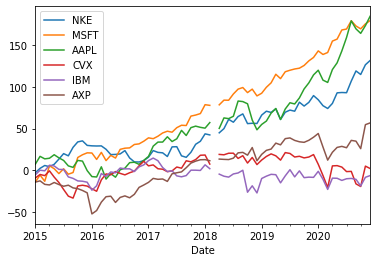

In [92]:
month_sum_q.plot();

In [93]:
# ВНИМАНИЕ не ОШИБИСЬ С ОПЕРАТОРОМ почему тут стоит LAST, а не sum или prod
# ВНИМАНИЕ почему такой код лучше предидушего?

month_sum=daily_sum_0.resample('MS').first()
month_sum

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2015-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-02-01,-3.127064,-11.687505,8.715175,-5.553076,-4.433346,-12.184440
2015-03-01,4.158490,-5.521652,17.328153,-5.568743,-0.636770,-11.920451
2015-04-01,5.132134,-12.819264,13.707964,-6.406511,-1.249201,-15.623842
2015-05-01,6.433156,5.668096,17.619920,-2.314436,7.645952,-17.067749
...,...,...,...,...,...,...
2020-08-01,93.718798,174.739440,161.532786,-0.350196,-8.835659,27.380755
2020-09-01,109.486313,179.821953,182.908573,-2.145797,-9.488325,36.813229
2020-10-01,119.887631,173.787100,170.186762,-18.256296,-11.129651,36.093347


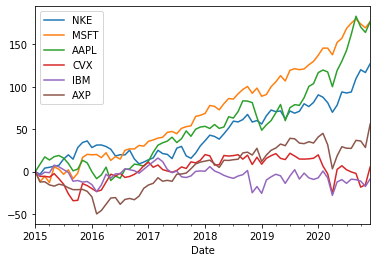

In [94]:
month_sum.plot();

In [95]:
month_prod=daily_prod_0.resample('MS').first()
month_prod

,NKE,MSFT,AAPL,CVX,IBM,AXP
Date,,,,,,
2015-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-02-01,0.967273,0.882806,1.085064,0.942086,0.954338,0.882928
2015-03-01,1.039146,0.938409,1.180737,0.940664,0.990251,0.881853
2015-04-01,1.047564,0.870830,1.136468,0.930805,0.982229,0.848527
2015-05-01,1.060507,1.040633,1.179457,0.968556,1.071640,0.835089
...,...,...,...,...,...,...
2020-08-01,2.069452,4.630881,3.985640,0.753331,0.767062,1.005590
2020-09-01,2.416921,4.860351,4.909174,0.737964,0.761446,1.101591
2020-10-01,2.665264,4.543627,4.272935,0.625511,0.747192,1.089336


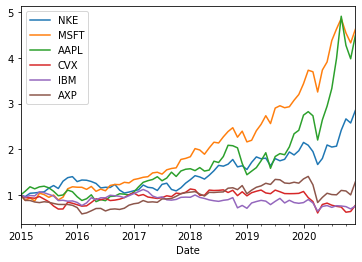

In [96]:
month_prod.plot();

### Скользящее среднее

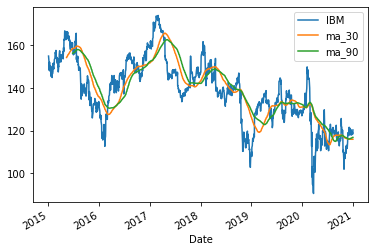

In [107]:
aapl_close=stoks_close['IBM']
ma_30=aapl_close.rolling(90).mean()
ma_90=aapl_close.rolling(120).mean()
result=pd.concat([aapl_close,ma_30,ma_90],axis=1)
result.columns=['IBM','ma_30','ma_90']
result.plot();

In [98]:
aapl_close=daily_sum_0['AAPL']
msft_close=daily_sum_0['MSFT']

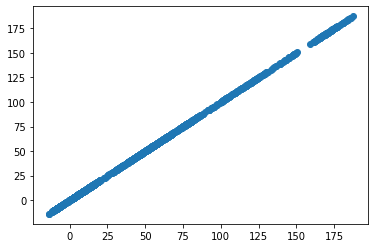

In [99]:
plt.scatter(aapl_close,aapl_close);

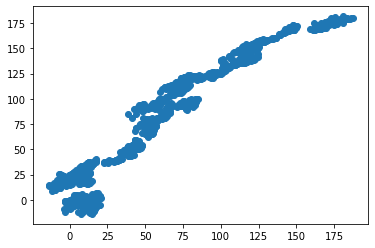

In [100]:
plt.scatter(aapl_close,msft_close);

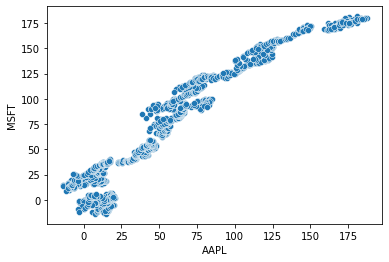

In [101]:
df=pd.concat([aapl_close,msft_close],axis=1)
sns.scatterplot(x="AAPL", y="MSFT",data=df);

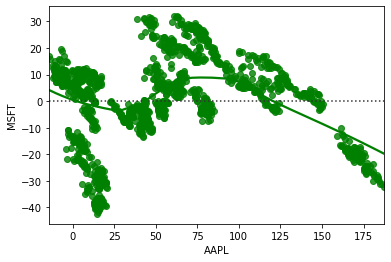

In [102]:
sns.residplot( x = aapl_close, y = msft_close, lowess=True, color="g");

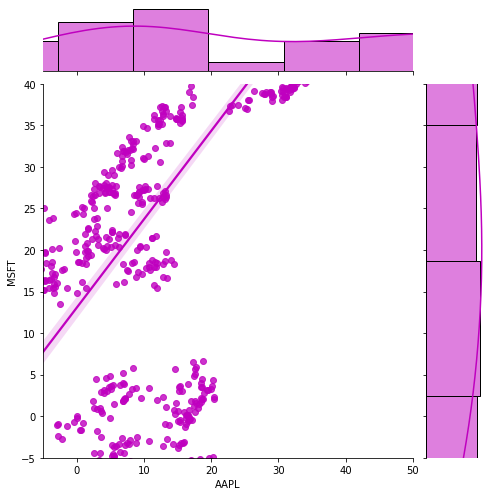

In [103]:
sns.jointplot(x="AAPL", y="MSFT", data=df, kind="reg", xlim=(-5,50), ylim=(-5,40), color="m", height=7);

### Волатильность

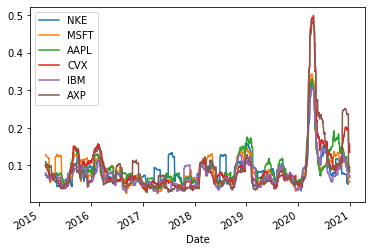

In [104]:
per=30

vol=daily_pct_0.rolling(per).std()*np.sqrt(per)
vol.plot();

### Оценикм риск

In [35]:
df_risk=pd.concat([daily_pct_0.mean(),daily_pct_0.std()],axis=1)
df_risk.columns=["mean",'std']
df_risk

,mean,std
NKE,0.000830,0.013725
MSFT,0.001289,0.009313
AAPL,0.001562,0.011135
CVX,0.000282,0.009084
IBM,-0.000294,0.009963
AXP,0.001134,0.008221


<AxesSubplot:xlabel='mean', ylabel='std'>

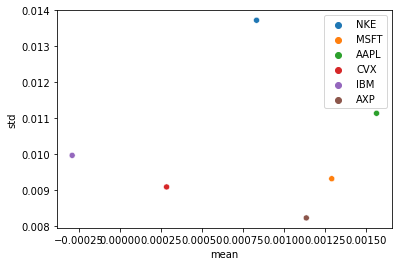

In [36]:
sns.scatterplot(x="mean", y="std",data=df_risk,hue=df_risk.index)

### Взаимная корреляция

напомним про клику и диверсификацию портфеля

In [37]:
corr=daily_pct_0.corr()
corr

,NKE,MSFT,AAPL,CVX,IBM,AXP
NKE,1.000000,0.024201,0.086174,0.016459,0.049699,0.159342
MSFT,0.024201,1.000000,0.438367,-0.114116,0.062886,0.241824
AAPL,0.086174,0.438367,1.000000,-0.014443,-0.020902,0.255991
CVX,0.016459,-0.114116,-0.014443,1.000000,0.094753,0.185144
IBM,0.049699,0.062886,-0.020902,0.094753,1.000000,0.222741
AXP,0.159342,0.241824,0.255991,0.185144,0.222741,1.000000


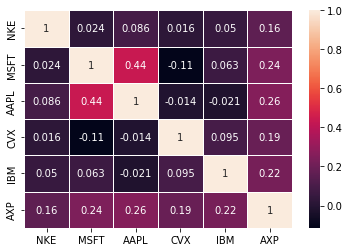

In [38]:
sns.heatmap(corr, annot=True, linewidths=.5);